In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("data_C.csv")

In [3]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [5]:
df.shape

(41258, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [7]:
df.columns = [col.replace(' ', '_').replace('.', '_').lower() for col in df.columns]
df.columns

Index(['unnamed:_0', 'id', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'churn'],
      dtype='object')

In [8]:
for c in df.columns:
    print(df[c].value_counts())
    print('_'*50)
    print()

unnamed:_0
0        1
27478    1
27500    1
27501    1
27502    1
        ..
13754    1
13755    1
13756    1
13757    1
41257    1
Name: count, Length: 41258, dtype: int64
__________________________________________________

id
157138    1
154382    1
71972     1
87228     1
3217      1
         ..
102535    1
495       1
139839    1
69569     1
154294    1
Name: count, Length: 41258, dtype: int64
__________________________________________________

customerid
15682355    32
15756901    29
15804787    26
15641490    26
15585835    25
            ..
15581326     1
15794396     1
15583668     1
15683871     1
15696231     1
Name: count, Length: 13212, dtype: int64
__________________________________________________

surname
Hsia              636
T'ien             571
Maclean           430
Kao               405
Hs?               397
                 ... 
Hopetoun            1
Wollstonecraft      1
Walkom              1
Fitzgerald          1
Igwebuike           1
Name: count, Length: 2272, d

In [9]:
df.nunique()

unnamed:_0         41258
id                 41258
customerid         13212
surname             2272
creditscore          444
geography              3
gender                 2
age                   71
tenure                11
balance            11410
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary    20841
churn                  2
dtype: int64

In [10]:
drop_col = ['unnamed:_0', 'id', 'customerid', 'surname']
df = df.drop(drop_col, axis=1)

**Identifier Columns:** Kolom **['unnamed:_0', 'id','customerid']** biasanya berfungsi sebagai identifikasi unik untuk setiap baris dalam dataset. Tidak mengandung informasi yang bermakna tentang pelanggan itu sendiri. Menghapusnya tidak menyebabkan kehilangan informasi yang bermakna tentang pelanggan.

**Redundant Information:** Kolom **['surname']** kemungkinan berisi nama belakang dari pelanggan. Tidak penting untuk memahami perilaku pelanggan atau memprediksi churn.

In [11]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [12]:
df.isnull().sum()

creditscore        12
geography           0
gender              0
age                 0
tenure              0
balance             0
numofproducts       0
hascrcard           0
isactivemember      0
estimatedsalary     0
churn               0
dtype: int64

terdapat missing values/NaN pada kolom **creditscore**

<Axes: ylabel='creditscore'>

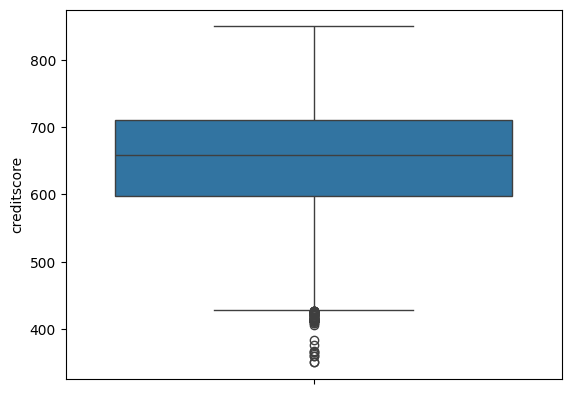

In [13]:
sns.boxplot(df['creditscore'])

Karena ada outliers, replace NaN values pada kolom **creditscore** menggunakan **median.**

In [14]:
median_cs = df['creditscore'].median()
df['creditscore'].fillna(median_cs, inplace=True)

In [15]:
df.isnull().sum()

creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
churn              0
dtype: int64

## EDA

data df sudah bersih dan tidak ada NaN values.

In [16]:
cat_col = ['geography', 'gender', 'hascrcard','isactivemember', 'churn']
num_col = df.drop(columns=cat_col)

print("Numerical Columns:", num_col)
print()
print("Categorical Columns:", cat_col)

Numerical Columns:        creditscore   age  tenure    balance  numofproducts  estimatedsalary
0            628.0  50.0       4  160133.08              1           653.53
1            710.0  34.0       8       0.00              2         72993.73
2            663.0  23.0       8  125470.81              1        174536.17
3            644.0  45.0       8       0.00              2         28690.90
4            627.0  23.0       5       0.00              2        134483.07
...            ...   ...     ...        ...            ...              ...
41253        641.0  38.0       2  138166.30              2         69227.66
41254        575.0  52.0       8       0.00              2        111342.66
41255        571.0  34.0       1  119452.03              2        173511.72
41256        624.0  38.0       4       0.00              1         40320.30
41257        668.0  29.0       7  105405.97              1        149853.89

[41258 rows x 6 columns]

Categorical Columns: ['geography', 'gender

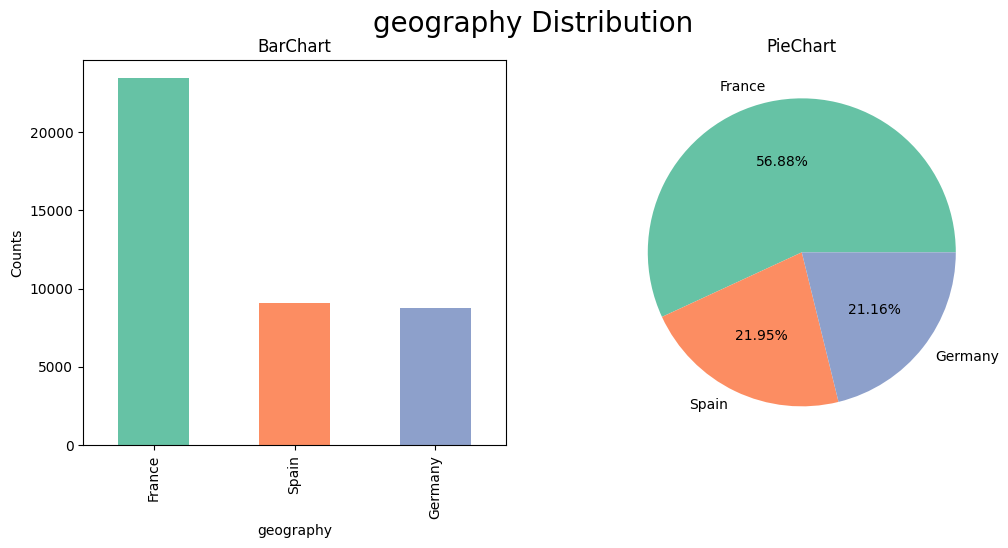

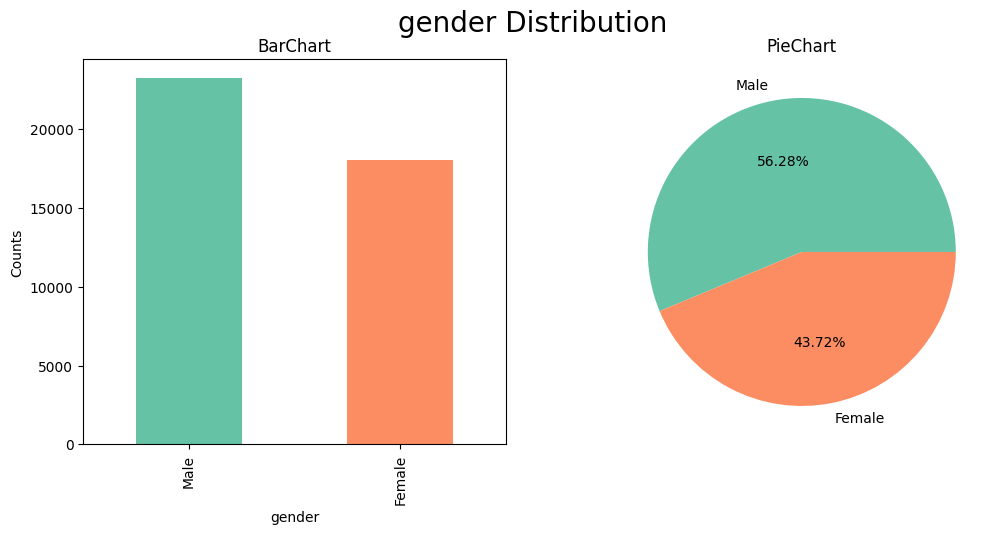

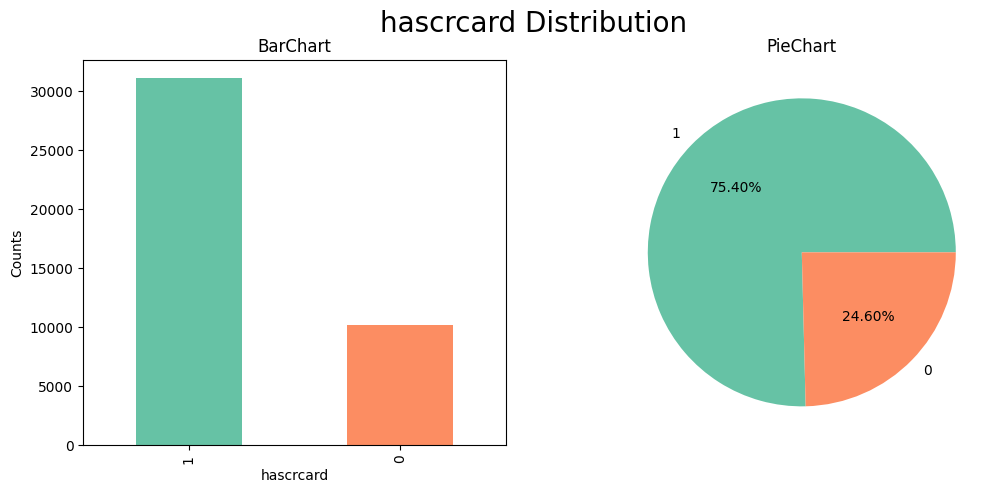

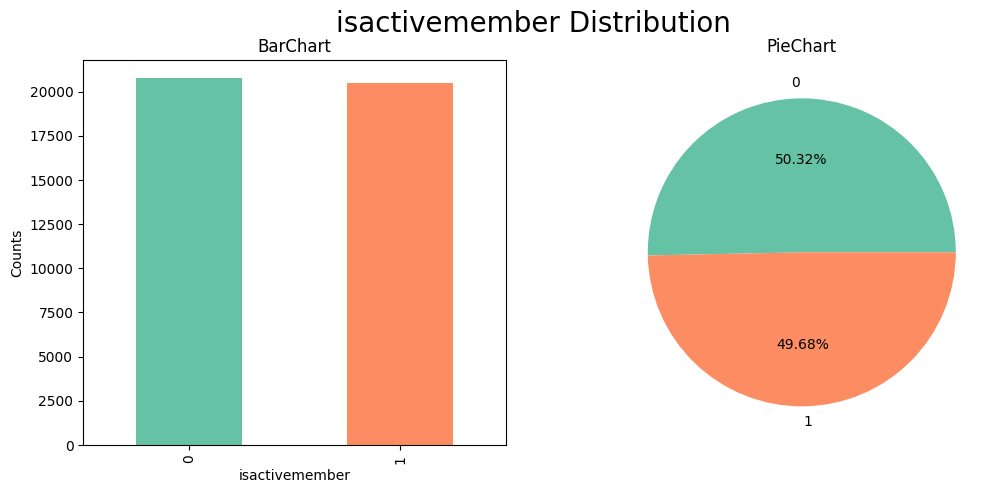

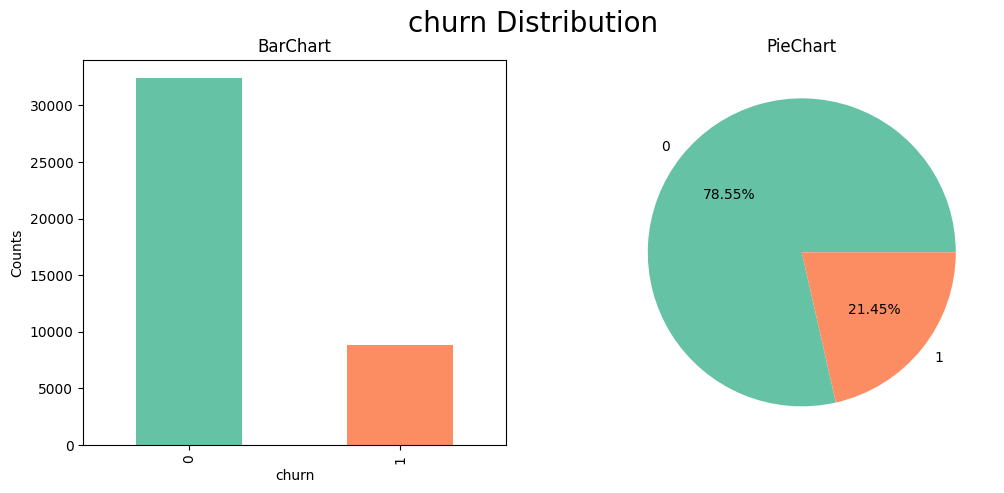

In [17]:
palette = sns.color_palette("Set2")

for column in cat_col:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle(f"{column} Distribution", fontsize=20)

    plt.subplot(1,2,1)
    df[column].value_counts().plot(kind='bar', color=palette)
    plt.title("BarChart")
    plt.ylabel("Counts")
    plt.xlabel(column)

    plt.subplot(1,2,2)
    df[column].value_counts().plot(kind='pie', colors=palette, autopct="%.2f%%")
    plt.title("PieChart")
    plt.ylabel("")

    plt.show()

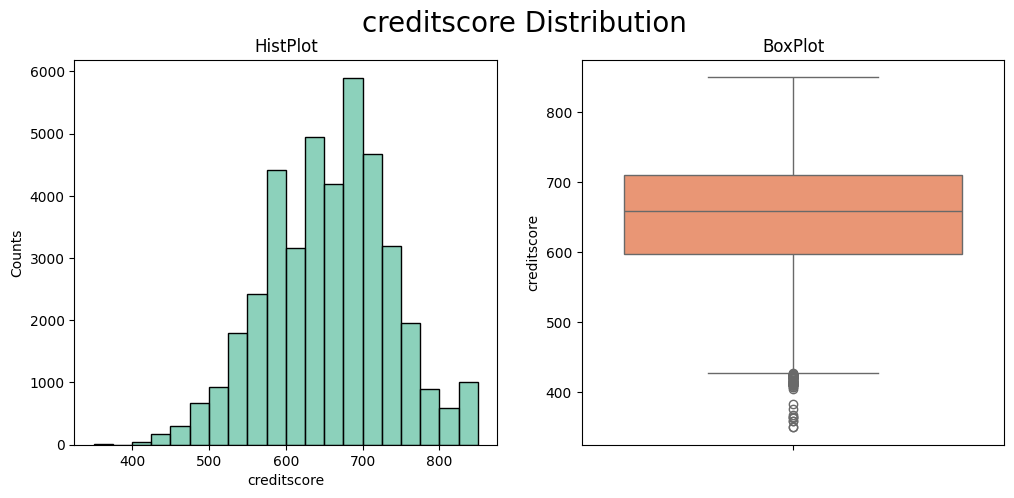

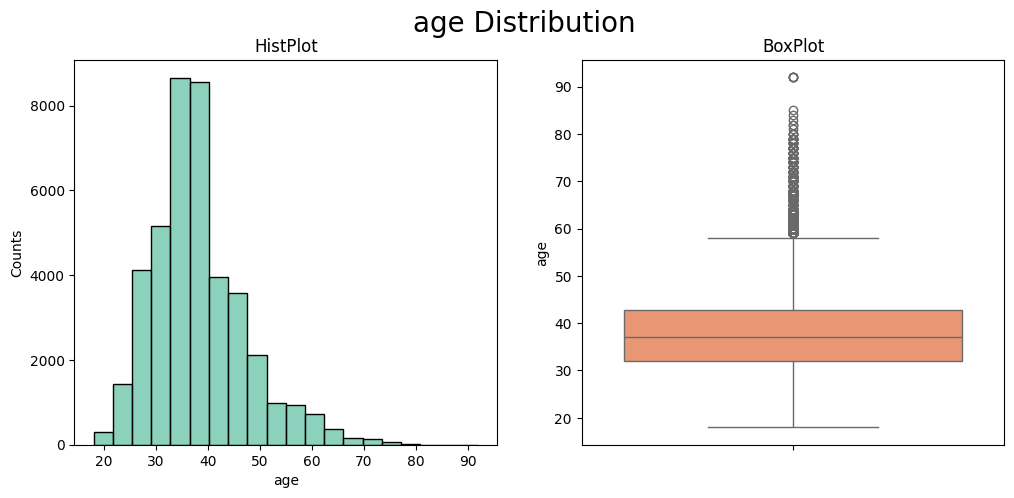

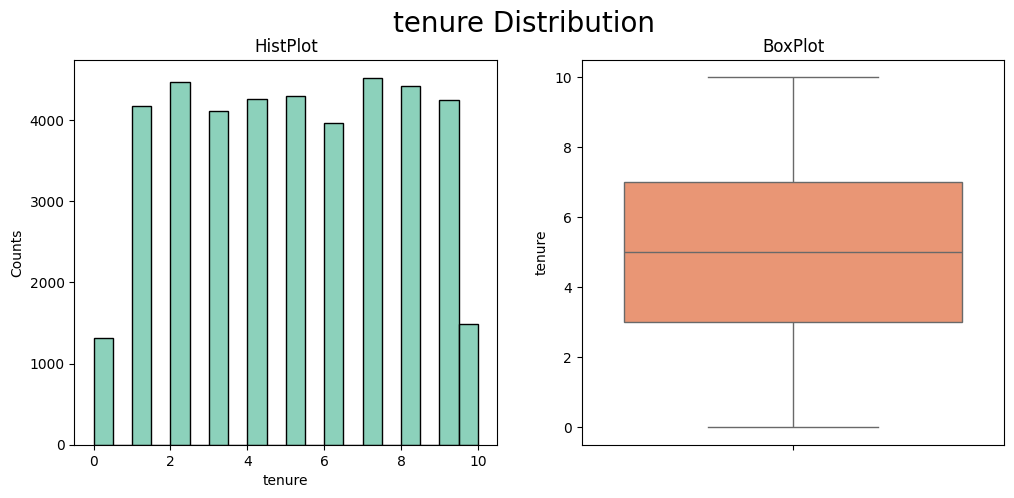

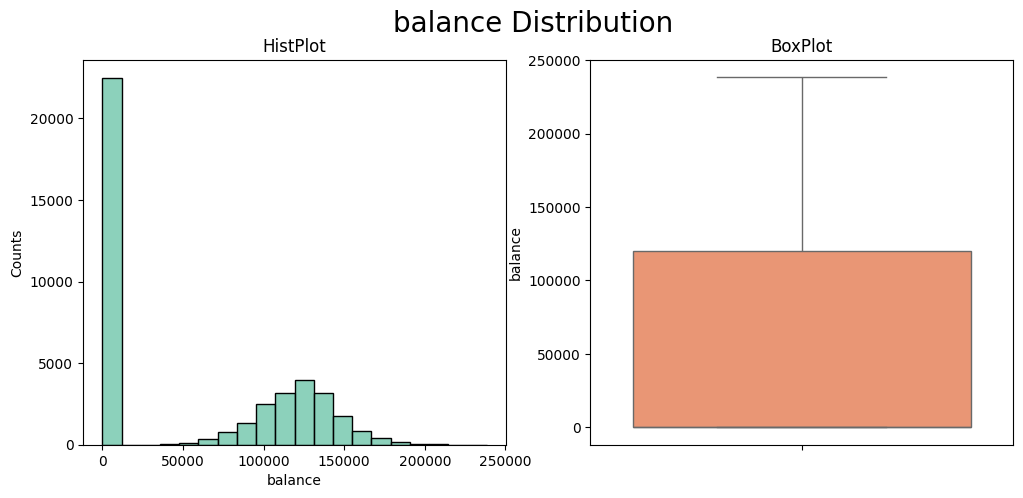

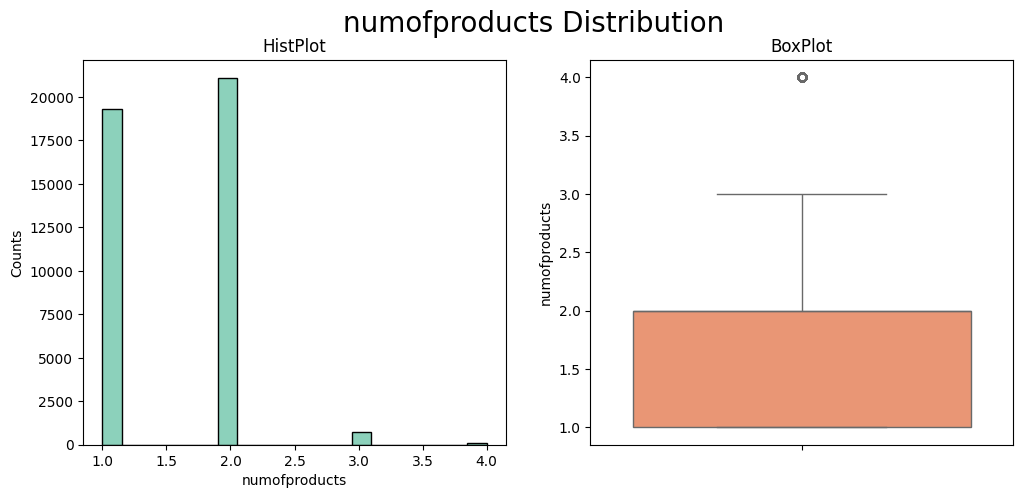

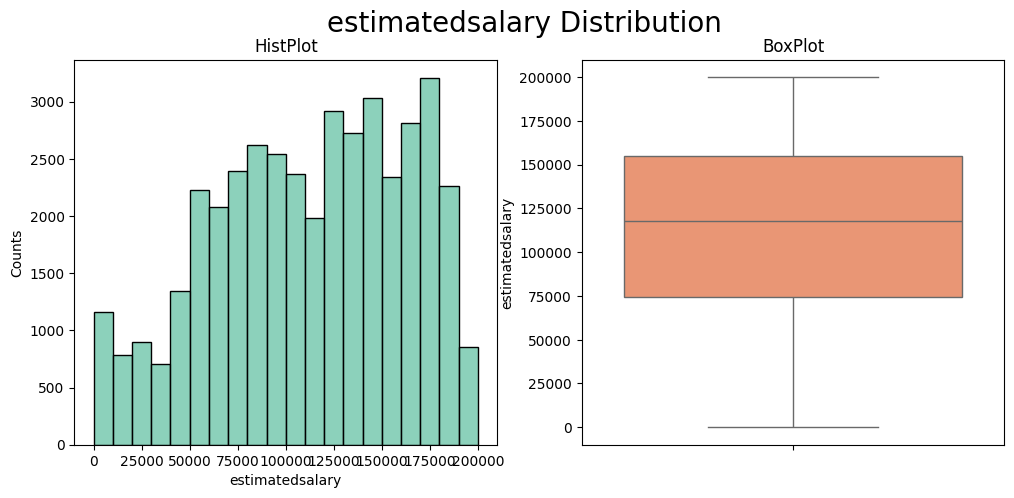

In [18]:
palette = sns.color_palette("Set2")

for column in num_col:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle(f"{column} Distribution", fontsize=20)

    plt.subplot(1,2,1)
    sns.histplot(df[column], color=palette[0], bins=20)
    plt.title("HistPlot")
    plt.xlabel(column)
    plt.ylabel("Counts")

    plt.subplot(1,2,2)
    sns.boxplot(df[column], color=palette[1])
    plt.title("BoxPlot")

    plt.show()

In [19]:
input_df  = df.drop('churn', axis = 1)
output_df = df['churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [20]:
x_train.shape

(33006, 10)

In [21]:
y_train.shape

(33006,)

In [22]:
x_test.shape

(8252, 10)

In [23]:
x_test.shape

(8252, 10)

## Feature Eningeering

In [24]:
enc_gender = {"gender": {"Male":0, "Female":1}}
x_train = x_train.replace(enc_gender)
x_test = x_test.replace(enc_gender)

print(x_train['gender'], x_test['gender'])

15731    1
6996     0
30824    1
40019    1
21501    1
        ..
6265     0
11284    1
38158    1
860      0
15795    1
Name: gender, Length: 33006, dtype: int64 22930    0
4280     0
40587    1
31318    0
34854    0
        ..
3493     0
17255    0
24735    1
4036     0
28660    1
Name: gender, Length: 8252, dtype: int64


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
OHE_col = ['geography']
OHE_encoder = OneHotEncoder()

encoded_train = OHE_encoder.fit_transform(x_train[OHE_col])
encoded_train_df = pd.DataFrame(encoded_train.toarray(), columns=OHE_encoder.get_feature_names_out())
x_train = x_train.reset_index()
x_train = pd.concat([x_train.drop(OHE_col, axis=1), encoded_train_df], axis=1)

In [27]:
x_train.head()

,index,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_France,geography_Germany,geography_Spain
0,15731,725.0,1,31.0,2,0.00,2,0,0,71830.10,0.0,0.0,1.0
1,6996,688.0,0,36.0,4,0.00,1,1,0,129870.93,0.0,0.0,1.0
2,30824,748.0,1,23.0,7,118028.35,1,0,1,41626.78,1.0,0.0,0.0
3,40019,701.0,1,45.0,5,0.00,2,1,1,158948.63,1.0,0.0,0.0
4,21501,590.0,1,23.0,5,113923.81,3,1,0,196789.90,1.0,0.0,0.0


In [28]:
encoded_test = OHE_encoder.transform(x_test[OHE_col])
encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=OHE_encoder.get_feature_names_out())
x_test = x_test.reset_index()
x_test = pd.concat([x_test.drop(OHE_col, axis=1), encoded_test_df], axis=1)

In [29]:
x_test.head()

,index,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_France,geography_Germany,geography_Spain
0,22930,787.0,0,36.0,6,170840.08,1,0,1,101371.72,1.0,0.0,0.0
1,4280,735.0,0,30.0,2,0.00,2,1,1,132908.07,1.0,0.0,0.0
2,40587,711.0,1,58.0,4,0.00,1,1,1,119110.03,1.0,0.0,0.0
3,31318,691.0,0,33.0,5,0.00,2,1,0,2010.98,0.0,0.0,1.0
4,34854,574.0,0,37.0,7,128061.00,1,1,0,62375.10,0.0,0.0,1.0


In [30]:
from sklearn.preprocessing import StandardScaler

scale_col = ['creditscore', 'balance', 'estimatedsalary']

scaler = StandardScaler()
x_train[scale_col] = scaler.fit_transform(x_train[scale_col])
x_test[scale_col] = scaler.transform(x_test[scale_col])

In [31]:
x_train.head()

,index,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_France,geography_Germany,geography_Spain
0,15731,0.867811,1,31.0,2,-0.885449,2,0,0,-0.815474,0.0,0.0,1.0
1,6996,0.403943,0,36.0,4,-0.885449,1,1,0,0.343632,0.0,0.0,1.0
2,30824,1.156161,1,23.0,7,0.991224,1,0,1,-1.418651,1.0,0.0,0.0
3,40019,0.566924,1,45.0,5,-0.885449,2,1,1,0.924329,1.0,0.0,0.0
4,21501,-0.824679,1,23.0,5,0.925961,3,1,0,1.680039,1.0,0.0,0.0


# MODELLING

### STANDARD MODEL

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf_model.predict(x_test)

In [35]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6431
           1       0.76      0.54      0.63      1821

    accuracy                           0.86      8252
   macro avg       0.82      0.75      0.77      8252
weighted avg       0.85      0.86      0.85      8252



### TUNED MODEL

In [36]:
parameters={
    'n_estimators': [50,100],
    'criterion': ['gini', 'entrophy'],
    'max_depth': [3,6,9]
}

In [37]:
rf_grid = GridSearchCV(RandomForestClassifier(),
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = 5)

In [38]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [3, 6, 9], 'n_estimators': [50, 100]},
             scoring='accuracy')

In [39]:
print("Best Param : ", rf_grid.best_params_)

Best Param :  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}


In [40]:
rf_best = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=50, random_state=42)
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=50, random_state=42)

In [41]:
y_pred = rf_best.predict(x_test)

In [42]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6431
           1       0.78      0.50      0.61      1821

    accuracy                           0.86      8252
   macro avg       0.83      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



In [43]:
print("Tuned RF:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Tuned RF:
Accuracy: 0.8593068347067377
Precision: 0.7835051546391752
Recall: 0.500823723228995
F1-Score: 0.6110552763819095


# Model 2 (XGB)

### Standard model

In [44]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
y_pred = xgb_model.predict(x_test)

In [46]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6431
           1       0.72      0.58      0.64      1821

    accuracy                           0.86      8252
   macro avg       0.80      0.76      0.78      8252
weighted avg       0.85      0.86      0.85      8252



### Tuned Model

In [47]:
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

In [48]:
xgb_grid = GridSearchCV(XGBClassifier(),
                      param_grid = parameters,
                      scoring = 'accuracy',
                      cv = 5)

In [49]:
xgb_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [50]:
print("Best Param : ", xgb_grid.best_params_)

Best Param :  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}


In [51]:
xgb_best = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=1, random_state=42)
xgb_best.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred = xgb_best.predict(x_test)

In [53]:
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6431
           1       0.77      0.54      0.64      1821

    accuracy                           0.86      8252
   macro avg       0.82      0.75      0.78      8252
weighted avg       0.86      0.86      0.85      8252



In [54]:
print("Tuned XGB:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Tuned XGB:
Accuracy: 0.8633058652447891
Precision: 0.7683965917893106
Recall: 0.5447556287753982
F1-Score: 0.6375321336760926


# EVALUATION

1. Tuned RF:
Tuned RF:
- Accuracy: 0.8593068347067377
- Precision: 0.7835051546391752
- Recall: 0.500823723228995
- F1-Score: 0.6110552763819095

2. Tuned XGB:
- Accuracy: 0.8633058652447891
- Precision: 0.7683965917893106
- Recall: 0.5447556287753982
- F1-Score: 0.6375321336760926

In [55]:
import pickle

with open(f'XGB_model.pkl', 'wb') as file:
    pickle.dump(xgb_best, file)